In [1]:
import pandas as pd
import seaborn as sns
sns.set(rc={"figure.figsize":(16, 10)})

In [2]:
def get_data(filename: str):
    src_df = pd.read_excel(filename)
    df = src_df.groupby(['Data wydania', 'Wydźwięk'], as_index=False).size().rename({"size": "Liczba wpisów"}, axis="columns")
    df = df.set_index('Data wydania')
    kryzys = src_df[['Kryzys', 'Data wydania']].copy()
    if kryzys['Kryzys'].notna().all():
        kryzys['Kryzys'] = kryzys['Kryzys'] != 'NIE'
    else:
        kryzys['Kryzys'] = kryzys['Kryzys'].notna()
    kryzys = kryzys.groupby(['Data wydania']).any()
    df = df.join(kryzys)
    colors = {
        'brak': 'blue',
        'negatywny': 'red',
        'neutralny': 'yellow',
        'pozytywny': 'green'
    }
    df['kolor'] = df['Wydźwięk'].apply(lambda x: colors[x])
    return df

def plot1(df: pd.DataFrame):
    ax = sns.lineplot(df[['Wydźwięk', 'Liczba wpisów']], x='Data wydania', y='Liczba wpisów', hue='Wydźwięk')
    ax.fill_between(df.index, 0, 1, where=df['Kryzys'], color='red', alpha=0.1, transform=ax.get_xaxis_transform())

def plot2(df: pd.DataFrame):
    ax = pd.pivot_table(df, columns=["Wydźwięk"], index=["Data wydania"], values=["Liczba wpisów"]).plot.area()
    ax.fill_between(df.index, 0, 1, where=df['Kryzys'], color='red', alpha=0.1, transform=ax.get_xaxis_transform())

In [3]:
files = [
    "'Dzień Dobry TVN'.xlsx",
    "Adam Glapiński i cena chleba.xlsx",
    "Afera Dwóch Wież Jarosława Kaczyńskiego.xlsx",
    "Afera Huawei – zatrzymanie Weijinga W. i Piotra D. pod zarzutem szpiegostwa.xlsx",
    "Afera hejterska – farma trolii w Ministerstwie Sprawiedliwości.xlsx"
]

In [4]:
df = get_data(files[0])

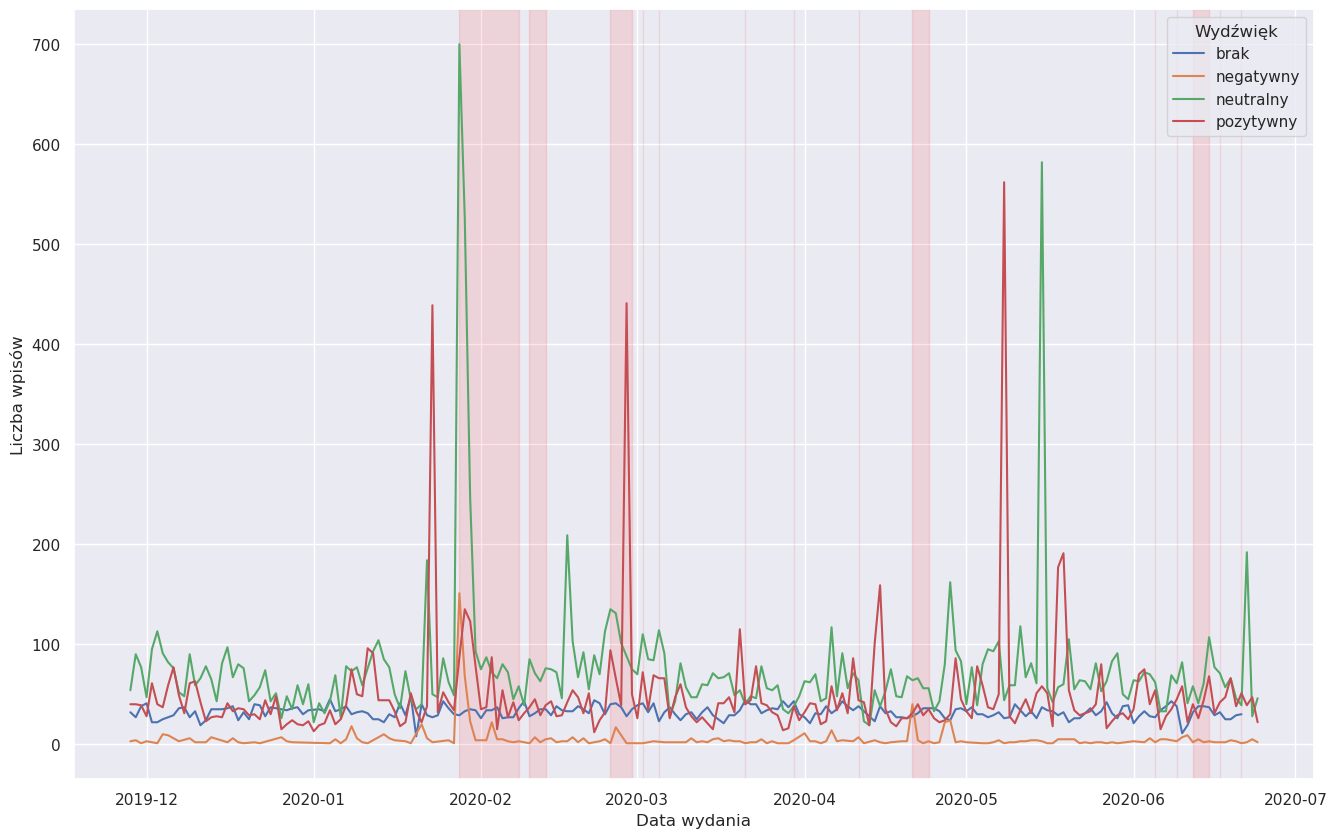

In [5]:
plot1(df)

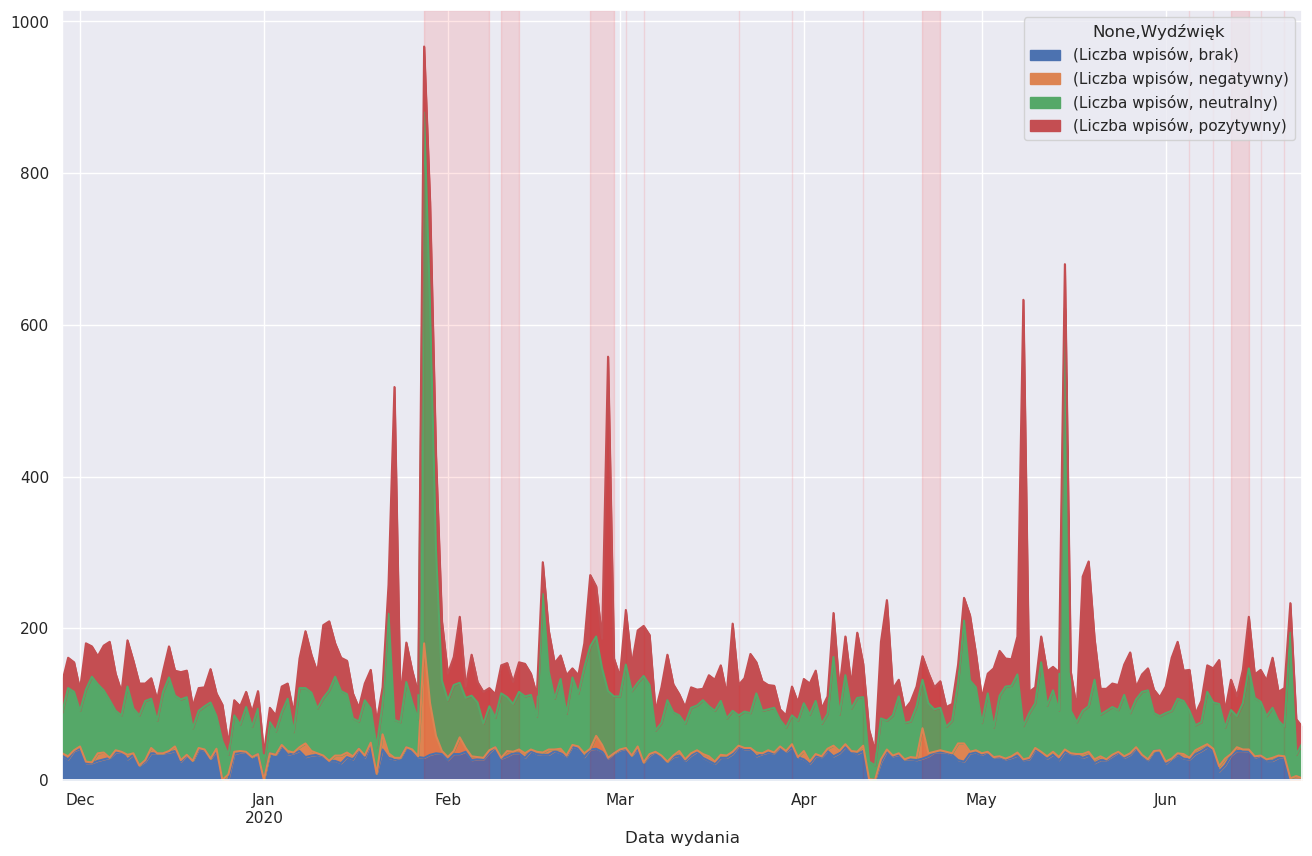

In [6]:
plot2(df)

In [7]:
df = get_data(files[1])

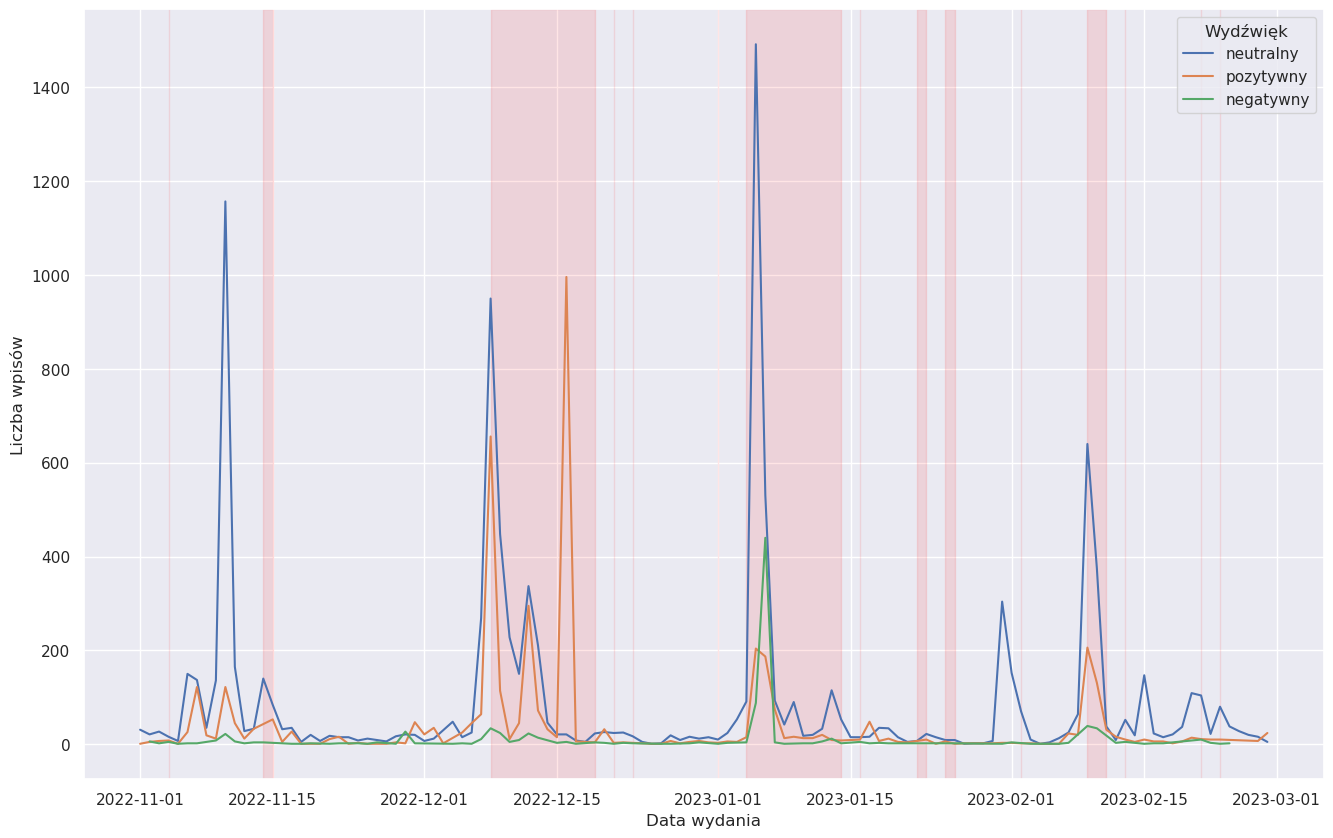

In [8]:
plot1(df)

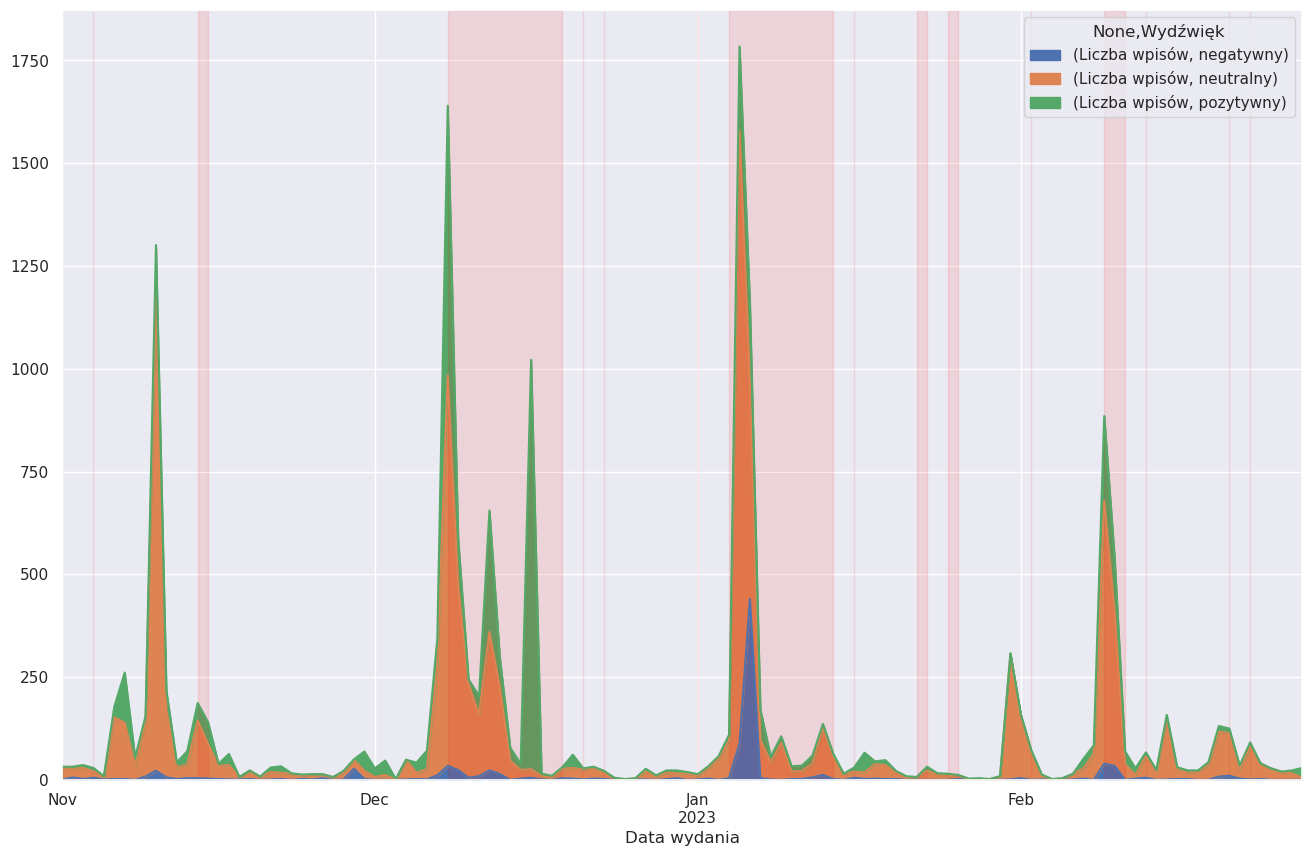

In [9]:
plot2(df)

In [10]:
df = get_data(files[2])

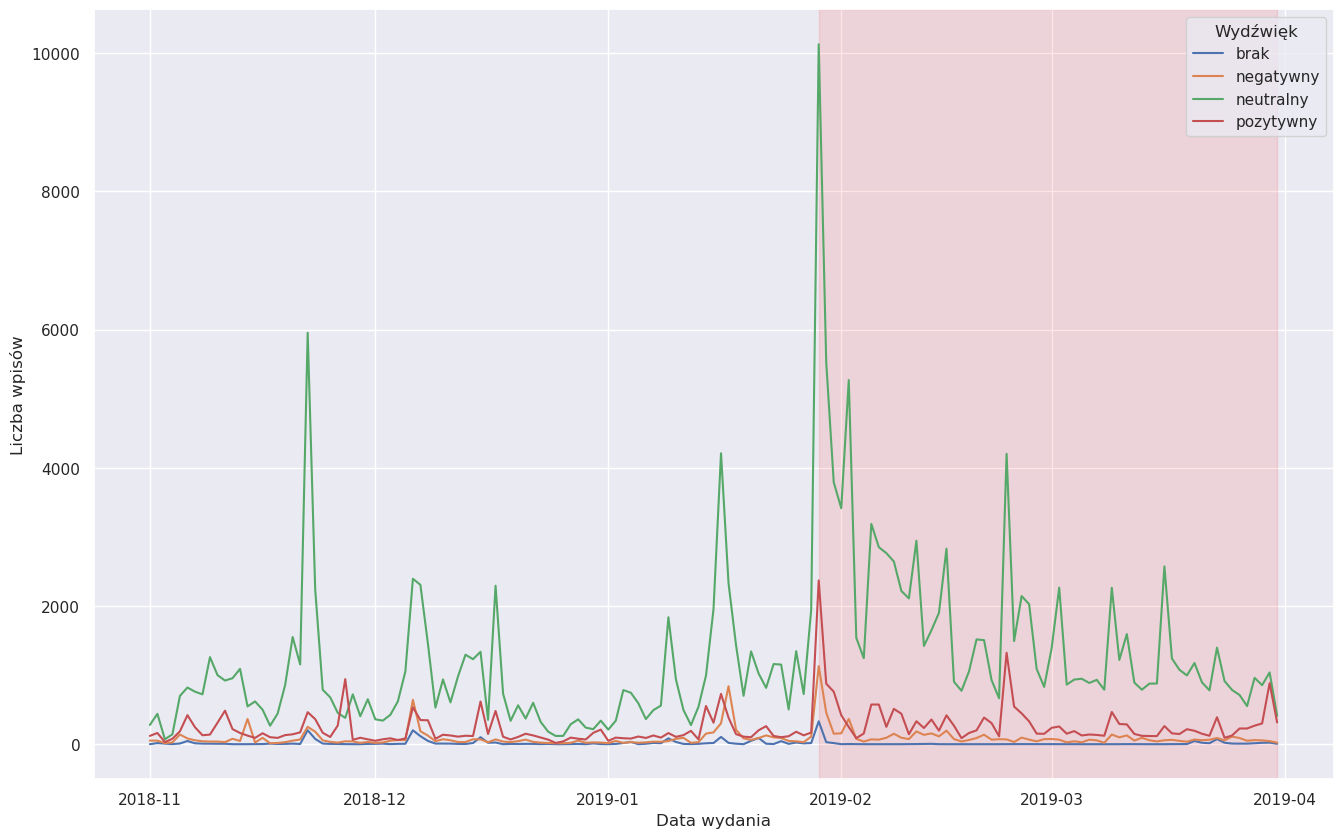

In [11]:
plot1(df)

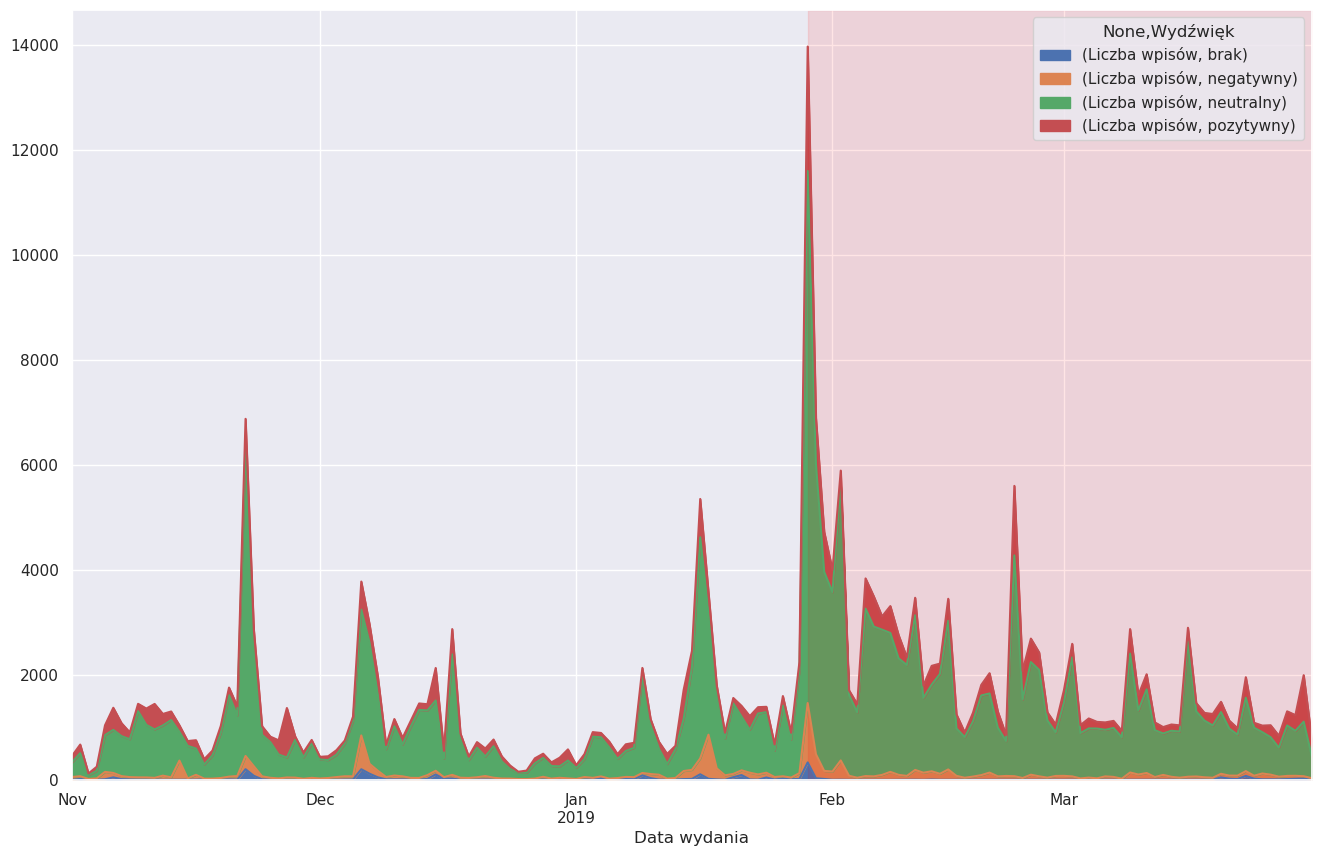

In [12]:
plot2(df)

In [13]:
df = get_data(files[3])

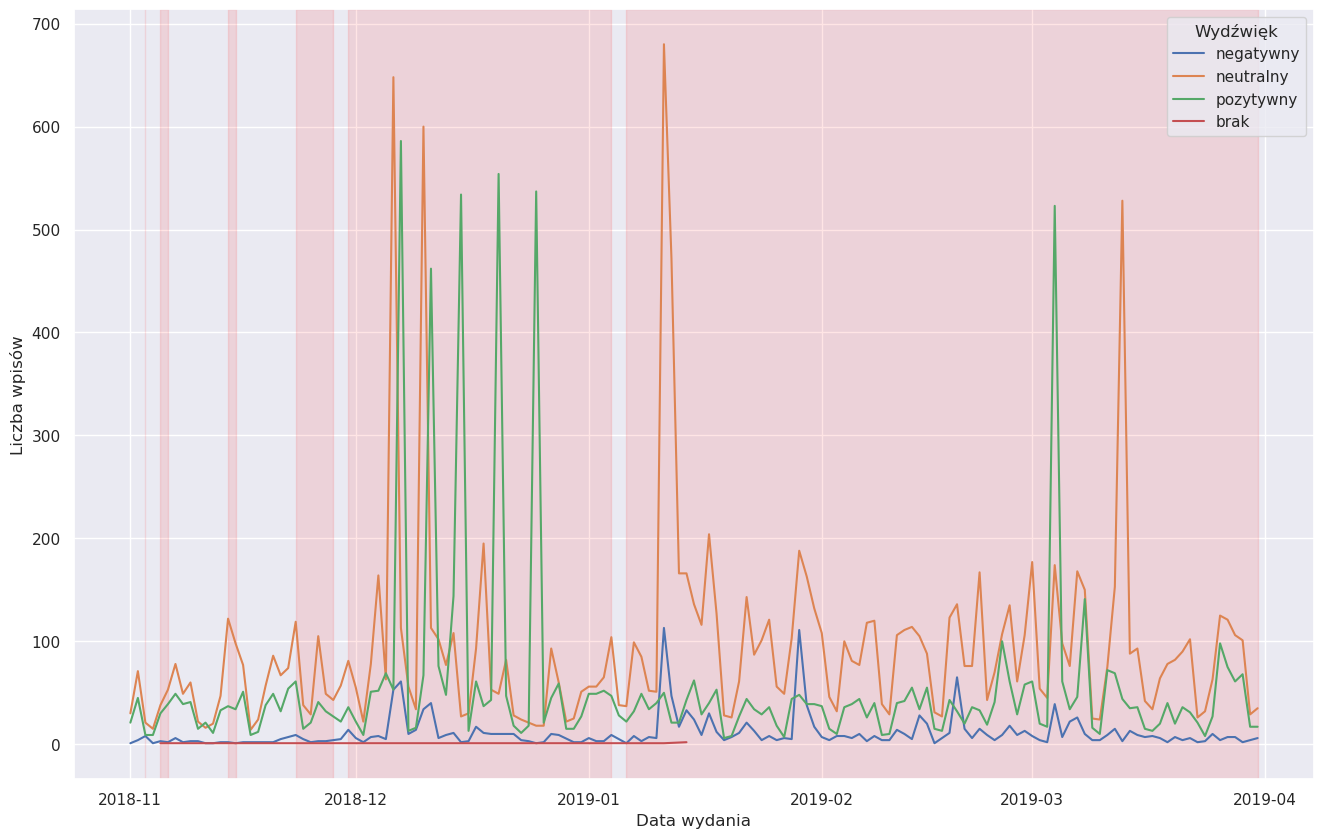

In [14]:
plot1(df)

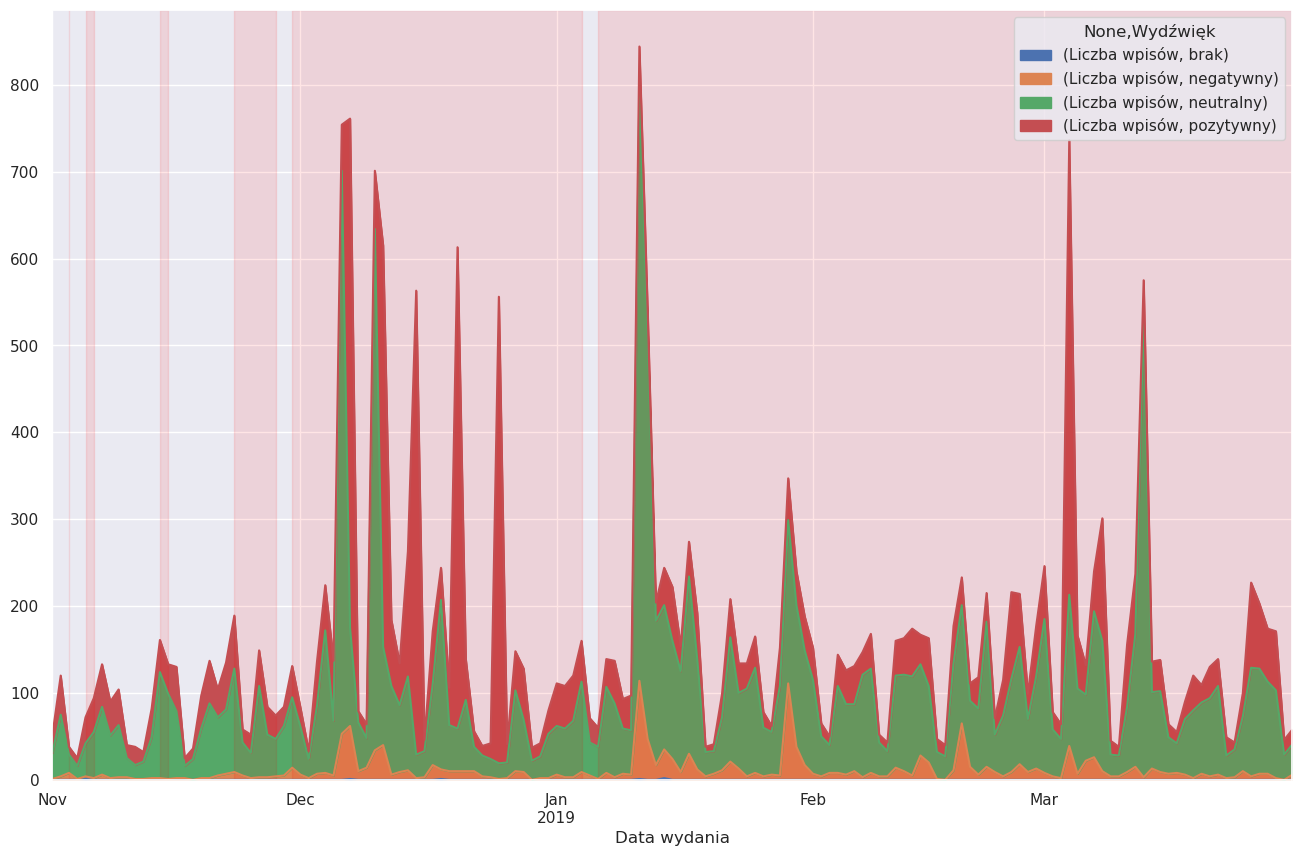

In [15]:
plot2(df)

In [16]:
df = get_data(files[4])

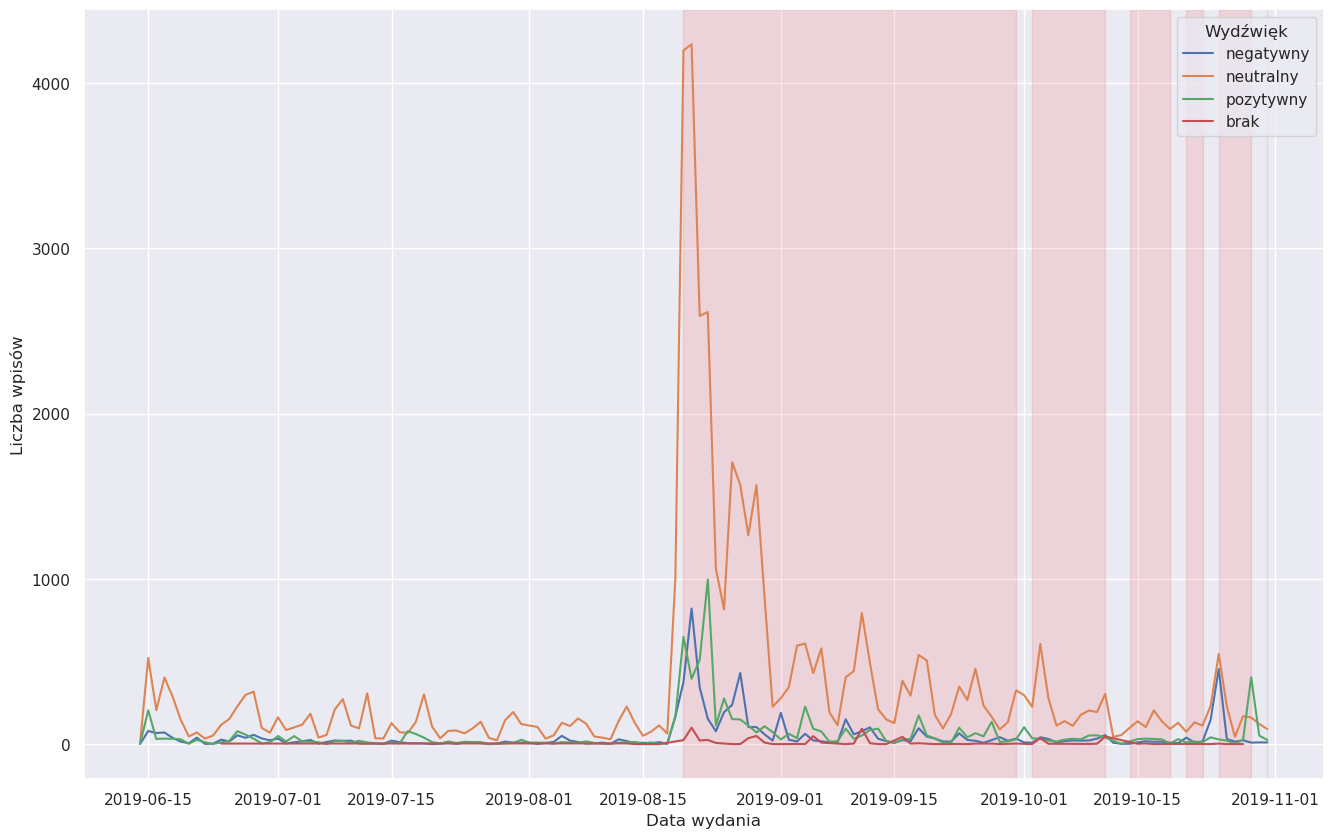

In [17]:
plot1(df)

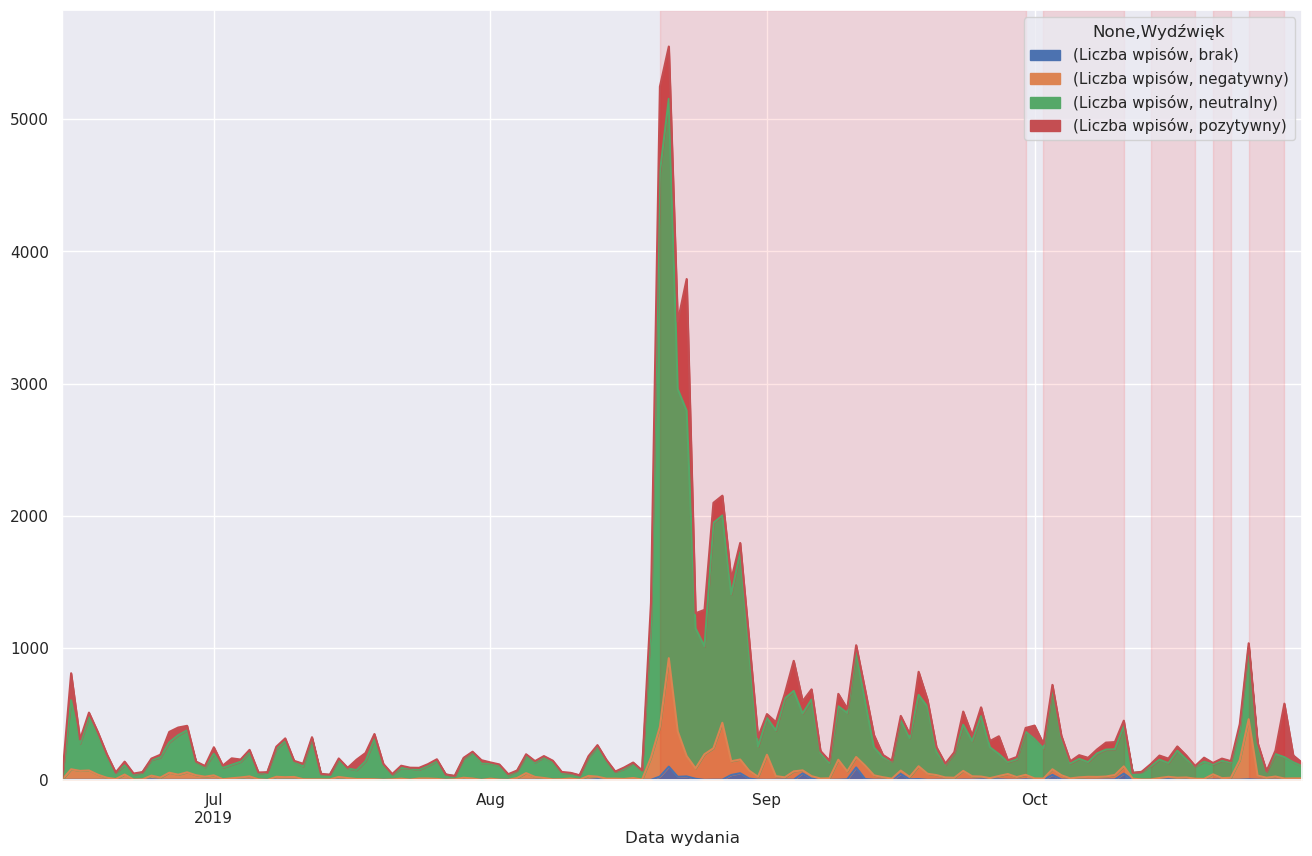

In [18]:
plot2(df)